## Colour Detection using DL

#### Imports:

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os
import cv2
import shutil
from shutil import copyfile
import random

import keras
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator # from keras.preprocessing.image import ImageDataGenerator is deprecated
from sklearn.model_selection import train_test_split
from keras.utils import load_img, img_to_array
from tensorflow import keras
from keras.applications.vgg16 import VGG16
from keras.applications import ResNet50
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, MaxPooling2D, BatchNormalization, Activation, Dropout, Flatten, Conv2D, GlobalAveragePooling2D
from keras.models import Model
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#### Plot history:

In [85]:
# function to plote training history
def plot_history(history):
    # store results
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # plot results
    # accuracy
    plt.figure(figsize=(5, 8))
    plt.rcParams['figure.figsize'] = [8, 4]
    plt.rcParams['font.size'] = 10
    plt.rcParams['axes.grid'] = True
    plt.rcParams['figure.facecolor'] = 'white'
    plt.subplot(2, 1, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.ylabel('Accuracy')
    plt.title(f'\nTraining and Validation Accuracy. \nTrain Accuracy: {str(round(acc[-1],3))}\nValidation Accuracy: {str(round(val_acc[-1],3))}')
    
    print()

    # loss
    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Cross Entropy')
    plt.title(f'Training and Validation Loss. \nTrain Loss: {str(round(loss[-1],3))}\nValidation Loss: {str(round(val_loss[-1],3))}')
    plt.xlabel('epoch')
    plt.tight_layout(pad=3.0)
    plt.show()

#### Setting up the data:

In [135]:
datagen = ImageDataGenerator(rescale=1./255)   

In [136]:
train_generator = datagen.flow_from_directory(
    '../Dataset/training_dataset',
    target_size=(224, 224),
    batch_size=20,
    class_mode='categorical')

Found 200 images belonging to 10 classes.


In [137]:
test_generator = datagen.flow_from_directory(
    '../Dataset/testing_dataset',
    target_size=(224, 224),
    batch_size=20,
    class_mode='categorical')

Found 50 images belonging to 10 classes.


#### Approach 1: ResNet15V2

In [153]:
ResNet_model = keras.applications.ResNet152V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [154]:
for layer in ResNet_model.layers[:-15]:       # Freezing all layers other than last 15 Layers
    layer.trainable = False

x = ResNet_model.output
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
output  = Dense(units=10, activation='softmax')(x)
model = Model(ResNet_model.input, output)

In [155]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_4[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 114, 114, 64)         0         ['conv1_conv[0][0]']          
                                                                                            

In [156]:
loss = keras.losses.CategoricalCrossentropy()
optimizer = keras.optimizers.legacy.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss=loss, metrics= ['accuracy'])

In [157]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=test_generator.n//test_generator.batch_size

In [158]:
STEP_SIZE_TRAIN

10

In [159]:
STEP_SIZE_VALID

2

In [160]:
history = model.fit_generator(generator=train_generator,
                            steps_per_epoch=STEP_SIZE_TRAIN,
                            validation_data=test_generator,
                            validation_steps=STEP_SIZE_VALID,
                            epochs=35)

Epoch 1/35


/var/folders/zv/x2lv03fs46n15fxz2b08zwx00000gn/T/ipykernel_8891/2883894314.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_generator,
2023-07-30 14:41:38.275674: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto
2023-07-30 14:41:38.393585: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto


10/10 [==============================] - ETA: 0s - loss: 1.6365 - accuracy: 0.3750

2023-07-30 14:41:44.318495: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto
2023-07-30 14:41:44.427476: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto


10/10 [==============================] - 12s 738ms/step - loss: 1.6365 - accuracy: 0.3750 - val_loss: 3.0839 - val_accuracy: 0.3250
Epoch 2/35
10/10 [==============================] - 4s 453ms/step - loss: 0.7167 - accuracy: 0.7500 - val_loss: 8.6285 - val_accuracy: 0.3750
Epoch 3/35
10/10 [==============================] - 4s 445ms/step - loss: 0.5369 - accuracy: 0.8350 - val_loss: 13.4876 - val_accuracy: 0.2750
Epoch 4/35
10/10 [==============================] - 5s 465ms/step - loss: 0.3679 - accuracy: 0.8800 - val_loss: 13.9437 - val_accuracy: 0.3250
Epoch 5/35
10/10 [==============================] - 5s 457ms/step - loss: 0.3457 - accuracy: 0.9050 - val_loss: 11.2271 - val_accuracy: 0.4500
Epoch 6/35
10/10 [==============================] - 4s 445ms/step - loss: 0.2997 - accuracy: 0.9250 - val_loss: 8.4951 - val_accuracy: 0.4750
Epoch 7/35
10/10 [==============================] - 4s 442ms/step - loss: 0.3145 - accuracy: 0.9250 - val_loss: 7.6230 - val_accuracy: 0.5250
Epoch 8/35
10

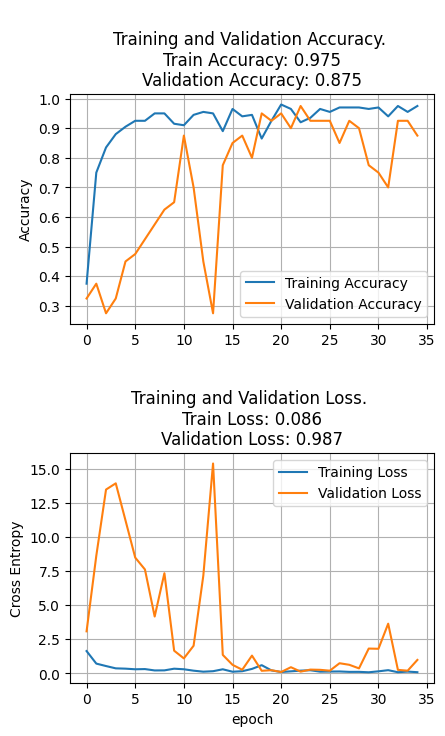

In [161]:
plot_history(history)

#### Approach 2: CNN

In [162]:
# Model Definition
INPUT_SHAPE = (224, 224, 3)

model = keras.Sequential()

model.add(Conv2D(32, (3, 3), input_shape = INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))


In [163]:
model.compile(loss='binary_crossentropy',
             optimizer='Adam',
             metrics=['accuracy'])

In [164]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 activation (Activation)     (None, 222, 222, 32)      0         
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 109, 109, 32)      0         
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 54, 54, 32)        0         
 ng2D)                                                  

In [166]:
history = model.fit_generator(generator=train_generator,
                            steps_per_epoch=STEP_SIZE_TRAIN,
                            validation_data=test_generator,
                            validation_steps=STEP_SIZE_VALID,
                            epochs=5)

Epoch 1/5
 1/10 [==>...........................] - ETA: 0s - loss: 0.3305 - accuracy: 0.9000

/var/folders/zv/x2lv03fs46n15fxz2b08zwx00000gn/T/ipykernel_8891/499041031.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_generator,


10/10 [==============================] - 1s 70ms/step - loss: 0.3298 - accuracy: 0.9000 - val_loss: 0.3271 - val_accuracy: 0.9000
Epoch 2/5
10/10 [==============================] - 1s 61ms/step - loss: 0.3297 - accuracy: 0.9000 - val_loss: 0.3286 - val_accuracy: 0.9000
Epoch 3/5
10/10 [==============================] - 1s 61ms/step - loss: 0.3302 - accuracy: 0.9000 - val_loss: 0.3257 - val_accuracy: 0.9000
Epoch 4/5
10/10 [==============================] - 1s 68ms/step - loss: 0.3303 - accuracy: 0.9000 - val_loss: 0.3253 - val_accuracy: 0.9000
Epoch 5/5
10/10 [==============================] - 1s 61ms/step - loss: 0.3295 - accuracy: 0.9000 - val_loss: 0.3264 - val_accuracy: 0.9000


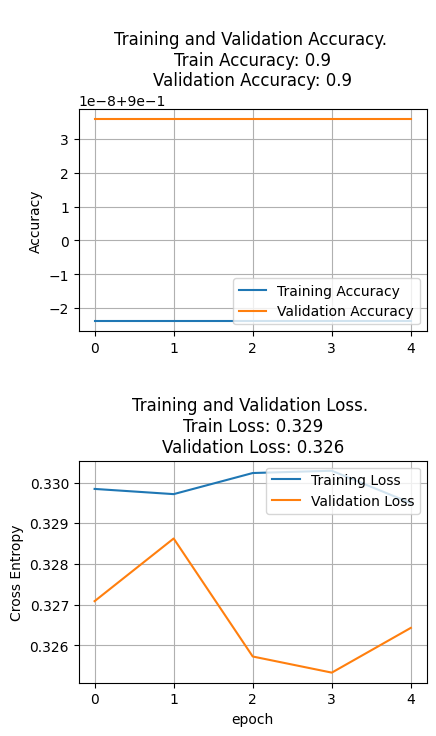

In [167]:
plot_history(history)

In [168]:
_, acc = model.evaluate(test_generator, verbose=0)
print("Accuracy: ", (acc*100.0), " %")

Accuracy:  89.99999761581421  %


#### Approach 3: VGG16

In [169]:
# Load the pre-trained VGG19 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

In [171]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
output  = Dense(units=10, activation='softmax')(x)
model = Model(base_model.input, output)

In [172]:
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [173]:
model.compile(optimizer = tf.keras.optimizers.legacy.Adam(),
            loss = 'binary_crossentropy',
            metrics=['accuracy'])

In [174]:
history = model.fit_generator(generator=train_generator,
                            steps_per_epoch=STEP_SIZE_TRAIN,
                            validation_data=test_generator,
                            validation_steps=STEP_SIZE_VALID,
                            epochs=20)

Epoch 1/20


/var/folders/zv/x2lv03fs46n15fxz2b08zwx00000gn/T/ipykernel_8891/2795265085.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_generator,
2023-07-30 14:51:08.544066: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto
2023-07-30 14:51:08.558139: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto


10/10 [==============================] - ETA: 0s - loss: 0.4161 - accuracy: 0.0950

2023-07-30 14:51:12.185122: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto
2023-07-30 14:51:12.193316: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto


10/10 [==============================] - 5s 379ms/step - loss: 0.4161 - accuracy: 0.0950 - val_loss: 0.3459 - val_accuracy: 0.1000
Epoch 2/20
10/10 [==============================] - 3s 340ms/step - loss: 0.3337 - accuracy: 0.1400 - val_loss: 0.3349 - val_accuracy: 0.1250
Epoch 3/20
10/10 [==============================] - 3s 332ms/step - loss: 0.3341 - accuracy: 0.1150 - val_loss: 0.3144 - val_accuracy: 0.2500
Epoch 4/20
10/10 [==============================] - 3s 333ms/step - loss: 0.3251 - accuracy: 0.1550 - val_loss: 0.3151 - val_accuracy: 0.3250
Epoch 5/20
10/10 [==============================] - 3s 336ms/step - loss: 0.3171 - accuracy: 0.1900 - val_loss: 0.3081 - val_accuracy: 0.4000
Epoch 6/20
10/10 [==============================] - 3s 332ms/step - loss: 0.3128 - accuracy: 0.2500 - val_loss: 0.3042 - val_accuracy: 0.2500
Epoch 7/20
10/10 [==============================] - 3s 334ms/step - loss: 0.3044 - accuracy: 0.3000 - val_loss: 0.2968 - val_accuracy: 0.3750
Epoch 8/20
10/10 

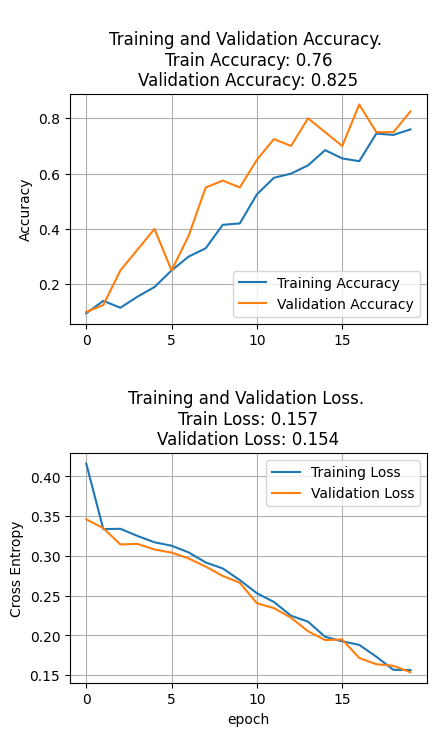

In [175]:
plot_history(history)

#### Approach 4: CNN with Attention mechanism

In [56]:
# importing modules and libraries

import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.layers import Input, InputLayer, Conv2D, MaxPooling2D, Flatten, ELU, Dense, BatchNormalization, Activation
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.optimizers import Nadam

##### Data Loading and Preprocessing

In [64]:
# updated datagen technique under keras (ImageDataGenerator is now image_dataset_from_directory under keras.utils)

dataset = keras.utils.image_dataset_from_directory(
    "../Dataset/training_dataset",
    image_size=(128, 128),
    batch_size=20
)

normalization_layer = keras.layers.Rescaling(1./255) # normalizing images from 0 to 255 to 0 to 1
normalized_dataset = dataset.map(lambda x, y: (normalization_layer(x), y)) # normalized images

images_list = [] # image container
labels_list = [] # label container

for images, labels in normalized_dataset: # taking out labels from folder name
    for image, label in zip(images, labels):
        image_array = image.numpy()
        images_list.append(image_array)
        labels_list.append(label.numpy())

image = np.asarray(images_list) # turning images to array

predictor_labels = [] # turning labels to probability distribution
for label in labels_list:
    one_hot_vector = np.zeros(10)
    one_hot_vector[label] = 1
    predictor_labels.append(one_hot_vector)

label = np.asarray(predictor_labels) # labels are now arrays of probability distribution

Found 250 files belonging to 10 classes.


##### Data Splitting

In [79]:
from sklearn.model_selection import train_test_split # splitting data for training

x_train, x_temp, y_train, y_temp = train_test_split(image,label,test_size=0.4,random_state=42)

x_test, x_val, y_test, y_val = train_test_split(x_temp,y_temp,test_size=0.5,random_state=42)

# train:val:test ratio : 60:20:20

# shapes of data

print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("x_test:", x_test.shape)
print("y_test:", y_test.shape)
print("x_val:", x_val.shape)
print("y_val:", y_val.shape)

x_train: (150, 128, 128, 3)
y_train: (150, 10)
x_test: (50, 128, 128, 3)
y_test: (50, 10)
x_val: (50, 128, 128, 3)
y_val: (50, 10)


##### Displaying first 32 kernels

c:\Users\ariha\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_46 (Conv2D)              │ (None, 125, 125, 32)   │         1,568 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,568 (6.12 KB)

 Trainable params: 1,568 (6.12 KB)

 Non-trainable params: 0 (0.00 B)

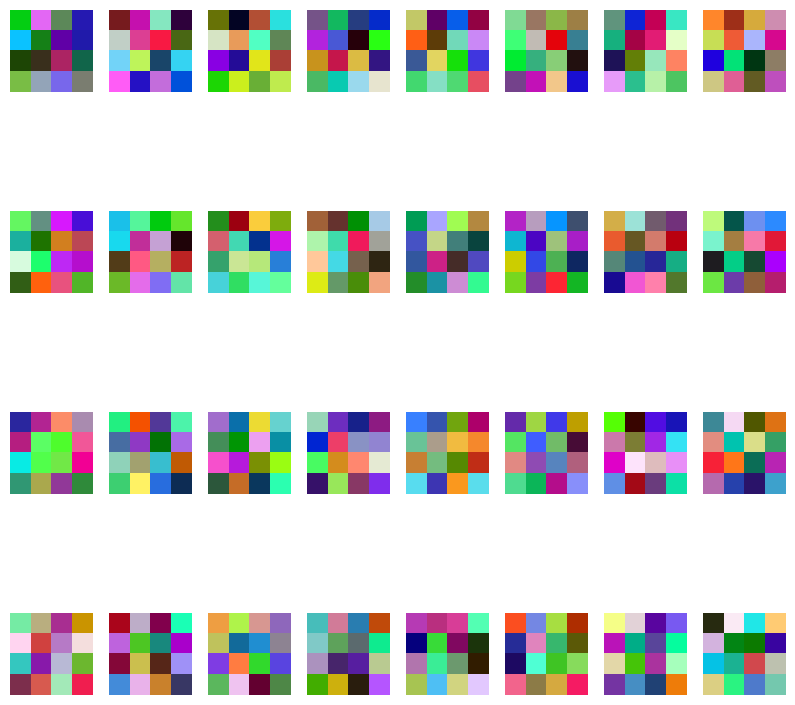

In [80]:
# model architecture to print first 32 kernels
input_layer = InputLayer(input_shape=(128, 128, 3))

conv_layer = Conv2D(32, 4, activation=ELU(), kernel_initializer='he_uniform')

conv_output = conv_layer(input_layer.output)

model = Sequential()
model.add(input_layer)
model.add(conv_layer)

model.build((None, 128, 128, 3)) # setting layers
model.summary() # model summary

weights = conv_layer.get_weights()[0] # getting weights

plt.figure(figsize=(10, 10)) # printing kernels
for i in range(32):
    plt.subplot(4, 8, i+1)
    kernel = weights[:, :, :, i]
    kernel = (kernel - kernel.min()) / (kernel.max() - kernel.min())
    plt.imshow(kernel)
    plt.axis('off')
plt.show()

##### Modelling

In [81]:
from keras.models import Model
from keras.layers import Multiply

def attention_mechanism(inputs): # Attention mechanism

    att_weights = Conv2D(1, kernel_size=(1, 1), activation='softmax', name='attention_weights')(inputs)

    attended_output = Multiply()([inputs, att_weights])
    
    return attended_output

# MOdel Checkpoint focused on val_accuracy to store best weights of max val_accuracy
model_checkpoint = ModelCheckpoint('model.keras', monitor='val_accuracy', save_best_only=True, verbose=1, mode='max')

input_dim = Input(shape=(128, 128, 3)) # input layer

# Convolutional layers with BatchNormalization and MaxPooling
layer_1 = Conv2D(32, 3, activation=ELU(), padding='same', kernel_initializer = 'he_uniform')(input_dim)
x = BatchNormalization()(layer_1)
x = MaxPooling2D(pool_size=2, padding='same')(x)

layer_2 = Conv2D(32, 3, activation=ELU(), padding='same', kernel_initializer = 'he_uniform')(x)
layer_2 = BatchNormalization()(layer_2)
x = MaxPooling2D(pool_size=2, padding='same')(layer_2)

layer_3 = Conv2D(32, 3, activation=ELU(), padding='same', kernel_initializer = 'he_uniform')(x)
layer_3 = BatchNormalization()(layer_3)
x = MaxPooling2D(pool_size=2, padding='same')(layer_3)

# Applying attention mechanism
x = attention_mechanism(x)

# Flatten layer to reshape data
x = Flatten()(x)

# Dense layers
layer_4 = Dense(64, activation=ELU())(x)

layer_5 = Dense(10, activation='softmax')(layer_4)

model = Model(inputs=input_dim, outputs=layer_5) # setting model layers
model.summary() # summary of model

model.compile(optimizer=Nadam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy']) # compiling the model

Model: "functional_47"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_23      │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_47 (Conv2D)  │ (None, 128, 128,  │        896 │ input_layer_23[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        128 │ conv2d_47[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_36    │ (None, 64, 64,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_48 (Conv2D)  │ (None, 64, 64,    │      9,248 │ max_pooling2d_36… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        128 │ conv2d_48[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_37    │ (None, 32, 32,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_49 (Conv2D)  │ (None, 32, 32,    │      9,248 │ max_pooling2d_37… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        128 │ conv2d_49[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_38    │ (None, 16, 16,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_weights   │ (None, 16, 16, 1) │         33 │ max_pooling2d_38… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply_12         │ (None, 16, 16,    │          0 │ max_pooling2d_38… │
│ (Multiply)          │ 32)               │            │ attention_weight… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_12          │ (None, 8192)      │          0 │ multiply_12[0][0] │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_24 (Dense)    │ (None, 64)        │    524,352 │ flatten_12[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_25 (Dense)    │ (None, 10)        │        650 │ dense_24[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 544,811 (2.08 MB)

 Trainable params: 544,619 (2.08 MB)

 Non-trainable params: 192 (768.00 B)

In [82]:
# training model
history = model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=40, callbacks=[model_checkpoint],verbose=1)

Epoch 1/40


c:\Users\ariha\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 16, 16, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step - accuracy: 0.1258 - loss: 22.2853
Epoch 1: val_accuracy improved from -inf to 0.32000, saving model to model.keras
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 615ms/step - accuracy: 0.1415 - loss: 23.0235 - val_accuracy: 0.3200 - val_loss: 43.3175
Epoch 2/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step - accuracy: 0.5333 - loss: 17.8492
Epoch 2: val_accuracy did not improve from 0.32000
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 461ms/step - accuracy: 0.5255 - loss: 17.9592 - val_accuracy: 0.3200 - val_loss: 74.7884
Epoch 3/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - accuracy: 0.7339 - loss: 9.1251
Epoch 3: val_accuracy improved from 0.32000 to 0.52000, saving model to model.keras
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 466ms/step - accuracy: 0.7327 - loss: 9.0801 - val_accuracy: 0.5200 - val_loss: 93.3797
Epoch 4/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step - accuracy: 0.8363 - loss: 6.7145
Epoch 4: val_accuracy did not improve from 0.52000
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 452ms/step - accuracy: 0.819

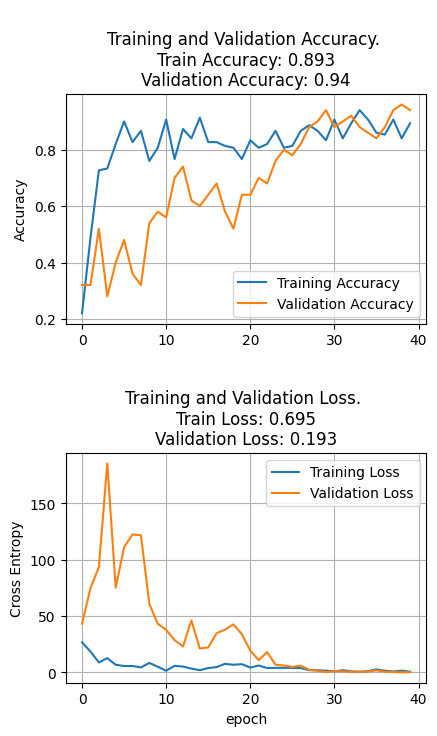

In [86]:
plot_history(history) # plotting graphs through function

##### Model Evaluation

In [84]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

model1 = keras.models.load_model('model.keras', custom_objects={"ELU": keras.layers.ELU}) # loading saved model

y_test_categorical = np.argmax(y_test, axis=1) # turning y_test probability distributions back to labels

y_pred_prob_val = model1.predict(x_test) # predicting

y_pred_val = np.argmax(y_pred_prob_val, axis=1) # turning y_pred probability distributions back to labels

# Accuracy
accuracy = accuracy_score(y_test_categorical, y_pred_val)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test_categorical, y_pred_val, average='macro')
print("Precision:", precision)

# Recall
recall = recall_score(y_test_categorical, y_pred_val, average='macro')
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_test_categorical, y_pred_val, average='macro')
print("F1 Score:", f1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_categorical, y_pred_val)
print("Confusion Matrix:")
print(conf_matrix)

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step

c:\Users\ariha\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 16, 16, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 236ms/step
Accuracy: 0.94
Precision: 0.949047619047619
Recall: 0.9466666666666667
F1 Score: 0.9450349650349651
Confusion Matrix:
[[5 0 0 0 0 0 0 0 0 0]
 [0 6 0 0 0 0 0 0 0 0]
 [0 0 6 0 0 0 0 0 0 0]
 [0 1 0 5 0 0 0 0 0 0]
 [1 0 0 0 4 0 0 0 0 0]
 [0 0 0 0 0 5 0 0 0 0]
 [0 0 0 0 0 0 3 0 0 0]
 [0 0 0 0 0 0 0 6 0 0]
 [0 0 0 0 1 0 0 0 5 0]
 [0 0 0 0 0 0 0 0 0 2]]
